In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [2]:
# Load dataset
df = pd.read_csv('/content/electricity_bill_dataset.csv')

In [3]:
# Select features and target column
X = df[['MonthlyHours']].values  # Feature column
y = df['ElectricityBill'].values  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# HANDLE MISSING DATA
# Check for missing values
missing_data = df.isnull().sum()
print("Missing Data per Column:")
print(missing_data)

Missing Data per Column:
Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


In [6]:
# Define categorical columns (those with data type 'object' or 'category')
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Label Encoding for categorical columns (if applicable)
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check the changes
print(df[categorical_cols].head())


   City  Company
0     5       27
1    15       13
2    14        8
3     7       19
4     7       20


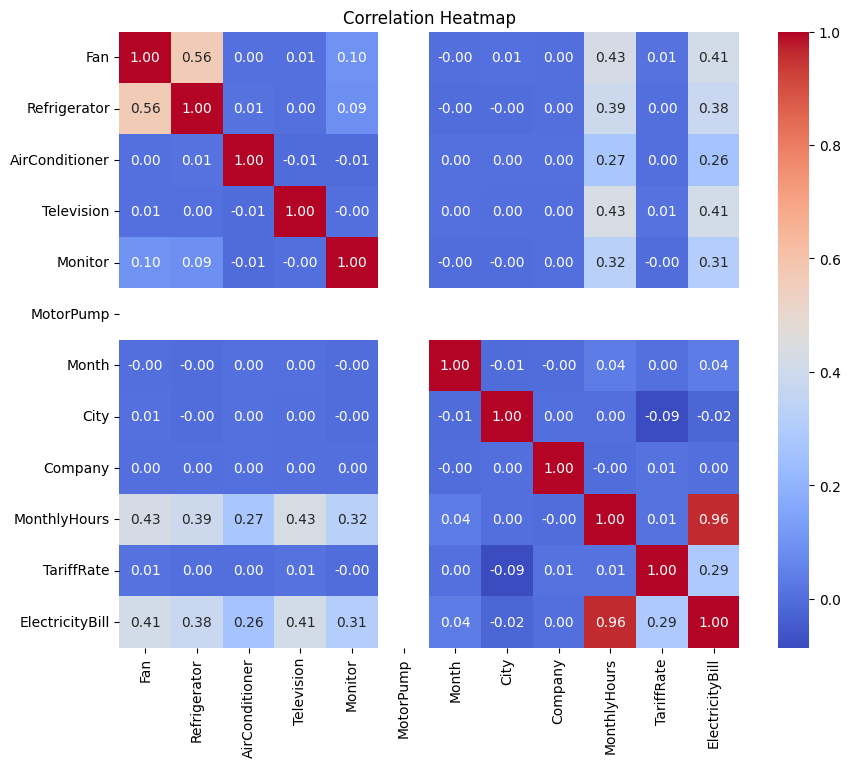

In [8]:
# CORRELATION
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# Define numerical columns (those with data type 'float64' or 'int64')
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Standard Scaling (Z-score normalization) for numerical data
scaler = StandardScaler()

# Apply scaling to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the scaled data
print(df[numerical_cols].head())


        Fan  Refrigerator  AirConditioner  Television   Monitor  MotorPump  \
0  0.367281      0.773990        0.444693   -1.129725 -0.478847        0.0   
1  0.915652      0.176103        0.444693   -1.650926 -0.478847        0.0   
2 -1.277830     -1.019672        0.444693   -1.129725  1.061633        0.0   
3 -1.277830      0.176103        1.341176    1.476277 -0.478847        0.0   
4 -0.546669      0.773990        0.444693   -0.261058 -0.478847        0.0   

      Month      City   Company  MonthlyHours  TariffRate  ElectricityBill  
0  1.019960 -0.535298  1.255259     -1.069049    0.052604        -1.011451  
1 -0.432171  1.639183 -0.267182     -0.220877   -0.987284        -0.470606  
2  0.148681  1.421735 -0.810911     -0.808073   -1.160598        -1.032310  
3 -0.141745 -0.100402  0.385293     -0.326899    1.439121         0.054223  
4 -1.303450 -0.100402  0.494039     -0.473697    1.439121        -0.099985  


In [12]:
# TRAIN/TEST SPLIT
# Replace 'ElectricityBill' with the actual target column name if it's different
X = df.drop('ElectricityBill', axis=1)  # Drop the target column from the features
y = df['ElectricityBill']  # Use 'ElectricityBill' as the target variable

# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (36276, 11)
Test set shape: (9069, 11)


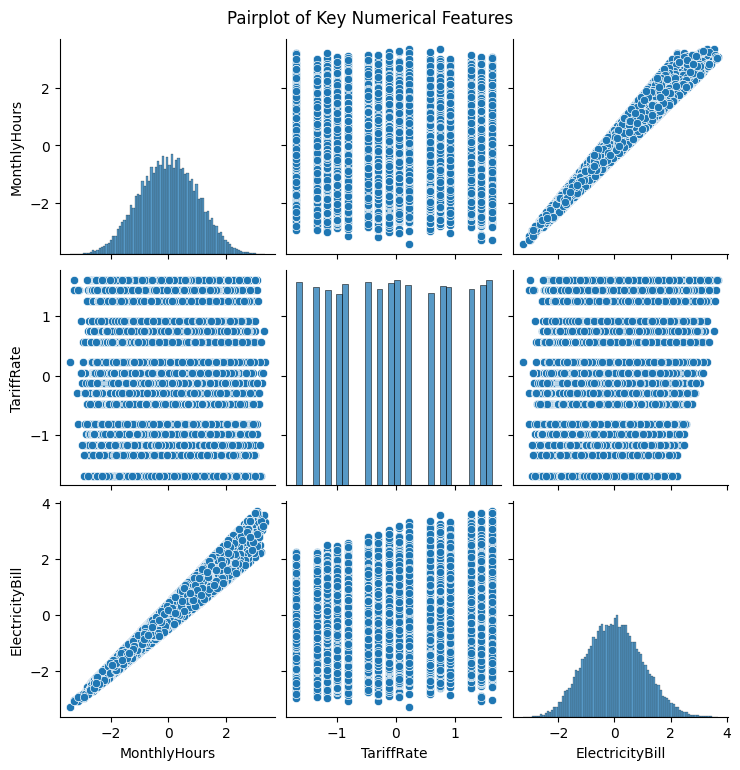

In [14]:
sns.pairplot(df[['MonthlyHours', 'TariffRate', 'ElectricityBill']])
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()


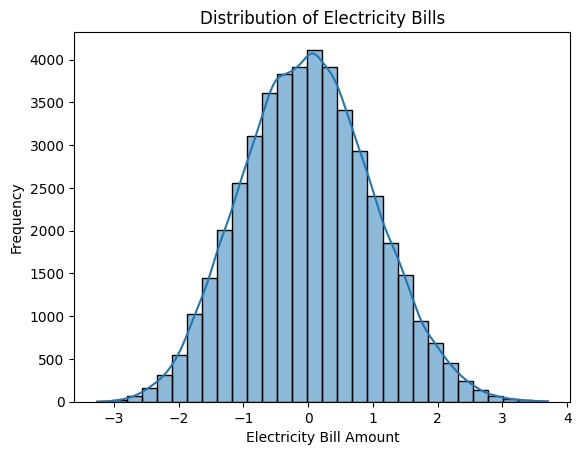

In [16]:
sns.histplot(df['ElectricityBill'], kde=True, bins=30)
plt.title("Distribution of Electricity Bills")
plt.xlabel("Electricity Bill Amount")
plt.ylabel("Frequency")
plt.show()



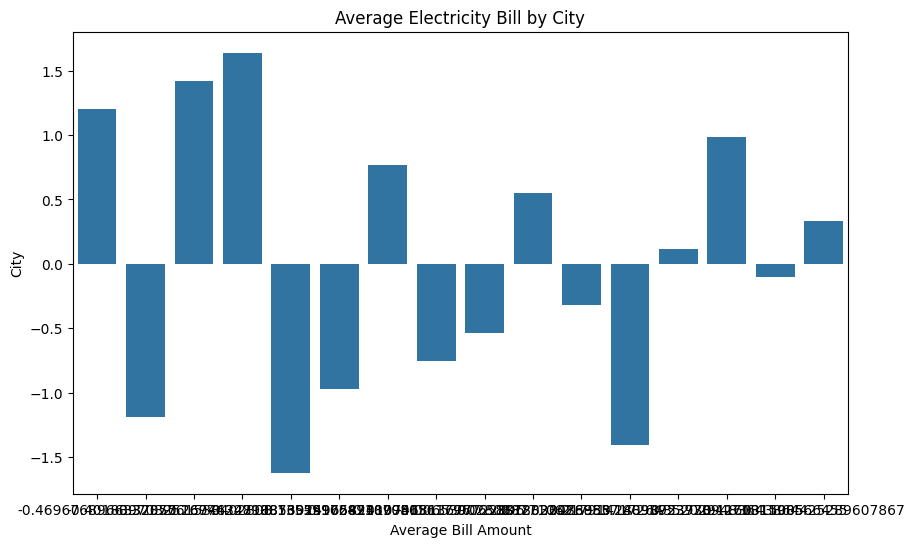

In [17]:
avg_bill_by_city = df.groupby('City')['ElectricityBill'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_bill_by_city.values, y=avg_bill_by_city.index)
plt.title("Average Electricity Bill by City")
plt.xlabel("Average Bill Amount")
plt.ylabel("City")
plt.show()


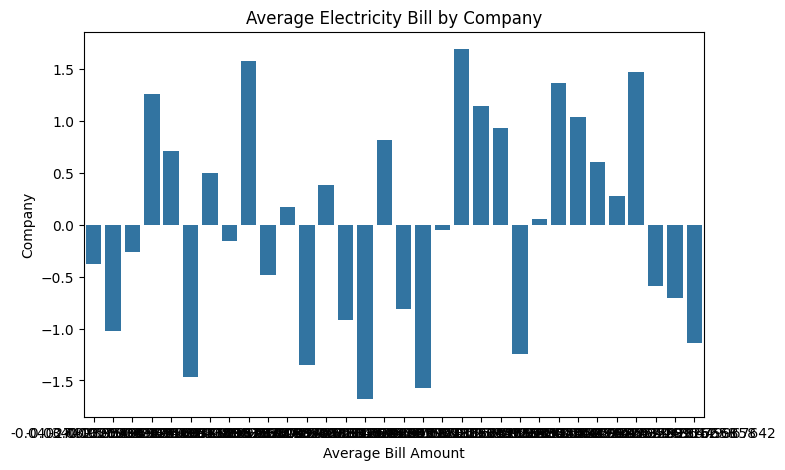

In [18]:
avg_bill_by_company = df.groupby('Company')['ElectricityBill'].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_bill_by_company.values, y=avg_bill_by_company.index)
plt.title("Average Electricity Bill by Company")
plt.xlabel("Average Bill Amount")
plt.ylabel("Company")
plt.show()


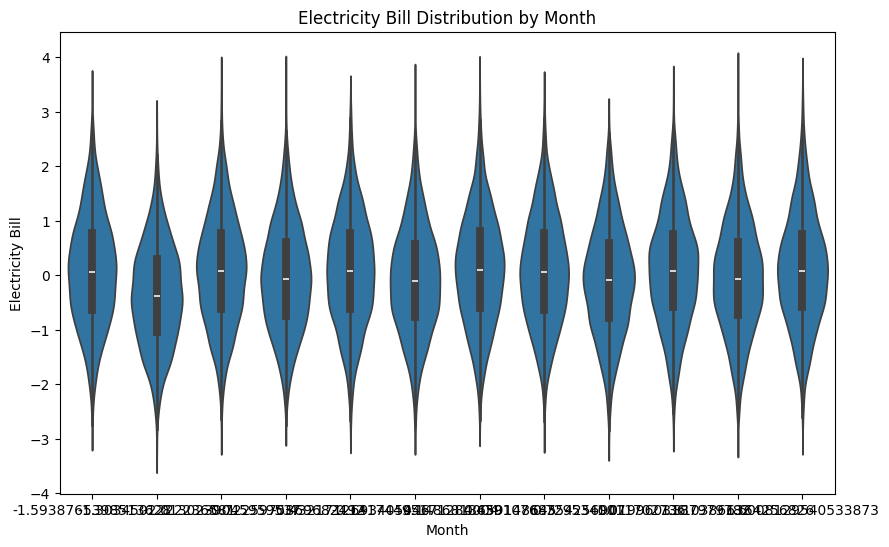

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Month', y='ElectricityBill', data=df)
plt.title("Electricity Bill Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Electricity Bill")
plt.show()


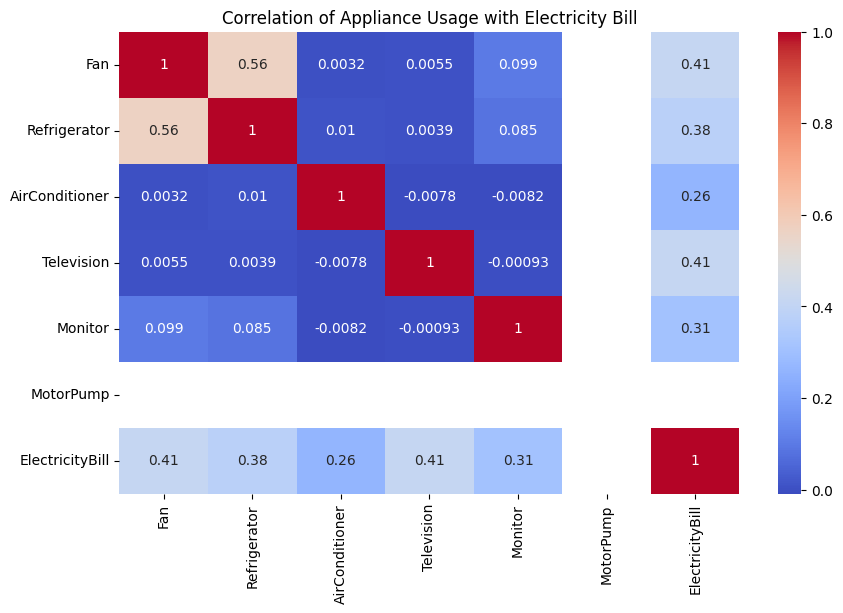

In [20]:
appliance_cols = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']

plt.figure(figsize=(10, 6))
sns.heatmap(df[appliance_cols + ['ElectricityBill']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Appliance Usage with Electricity Bill")
plt.show()
